# First Thing First:

## What Question do we need to answer?

Business Goals

Find drivers for customer churn at Telco. Why are customers churning?

Construct a ML classification model that accurately predicts customer churn.

Deliver a report that a non-data scientist can read through and understand what steps were taken, why and what was the outcome?

# Project Outline
1. acquire, prep and clean TELCO data set.

    b. create a data dictionary
    
    c. Split into train, validate, test sets.
    
    d. create an encoded data set, and retain an unencoded set.
    
2. perform exploratory analysis on the unencoded data set

    a. set hypotheses
        
    b. demonstrate graphically
        
    c. run statistical testing on related variables/variables of interest driving churn
        
    d. document takeaways
        
3. modeling:

    a. pick the appropriate model: decision tree, random forest, KNN or logistic regression. All are classifiers
    
    b. fit, train and test models.
    
    c. Pick highest performing models (30 to run on validate set
    
    d. Run the highest performing model on the test data

# 1. Acquire/Prep/Clean/Split

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

import acquire
import prepare
import split

In [2]:
#acquire the data
df = acquire.get_telco_data()
df = prepare.prep_telco(df)
df.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL


In [3]:
#df.shape

In [4]:
#df.isna().sum()

In [5]:
# create an encoded df for modeling
encoded_df = prepare.encode_telco(df)
encoded_df.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,0,...,1,1,1,0,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,0,...,0,1,1,0,0,0,0,1,1,0


In [6]:
encoded_df.shape

(7032, 32)

In [7]:
#Now split for exploratory data analysis (unencoded dataframe), and modeling (encoded dataframe)

In [8]:
train, validate, test = split.train_validate_test_split(df, 'churn')
train.churn.value_counts(), validate.churn.value_counts(), test.churn.value_counts()

(No     2891
 Yes    1046
 Name: churn, dtype: int64,
 No     1239
 Yes     449
 Name: churn, dtype: int64,
 No     1033
 Yes     374
 Name: churn, dtype: int64)

In [9]:
encoded_train, encoded_validate, encoded_test = split.train_validate_test_split(encoded_df, "churn_Yes")

In [10]:
encoded_train.churn_Yes.value_counts(), encoded_validate.churn_Yes.value_counts(), encoded_test.churn_Yes.value_counts()

(0    2891
 1    1046
 Name: churn_Yes, dtype: int64,
 0    1239
 1     449
 Name: churn_Yes, dtype: int64,
 0    1033
 1     374
 Name: churn_Yes, dtype: int64)

# 2. Exploratory Data Analysis

### - The Process of EDA:

    1. Hypothesize: Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable). You can do this in the form of questions in a natural language (as opposed to "statistical" language).

    2. Visualize: use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

    3. Test your hypotheses when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)
    
### Variables to explore and hypotheses:

    1. Churn: Payment Type (Cat/Cat)
    2. Churn: Total Charges (Cat/Cont)
    3. Churn: Monthly Charges (Cat/Cont)
    4. Churn: Dependents (Cat/Cat)
    5. Churn: Senior Citizen (Cat/Cat)
    6. Churn: Tenure (Cat/Cont)
    7. Churn: Gender (Cat/Cat)
    8. Churn: Internet Service (Cat/Cat)
    9. Churn: Contract Type

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            3937 non-null   object 
 1   gender                 3937 non-null   object 
 2   senior_citizen         3937 non-null   int64  
 3   partner                3937 non-null   object 
 4   dependents             3937 non-null   object 
 5   tenure                 3937 non-null   int64  
 6   phone_service          3937 non-null   object 
 7   multiple_lines         3937 non-null   object 
 8   online_security        3937 non-null   object 
 9   online_backup          3937 non-null   object 
 10  device_protection      3937 non-null   object 
 11  tech_support           3937 non-null   object 
 12  streaming_tv           3937 non-null   object 
 13  streaming_movies       3937 non-null   object 
 14  paperless_billing      3937 non-null   object 
 15  m

In [12]:
# Visualize distributions for quantitative columns
#QUANT COLS
quant_col = train.select_dtypes(['int64', 'float64']).columns
#interesting_quant_cols

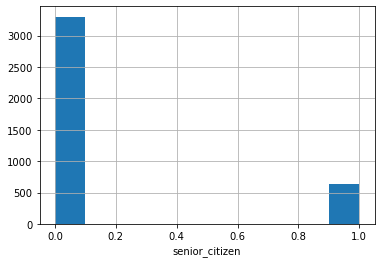

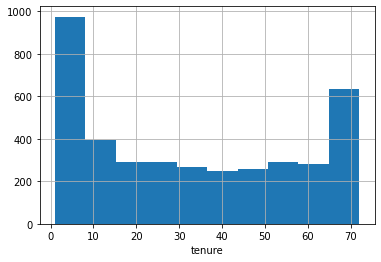

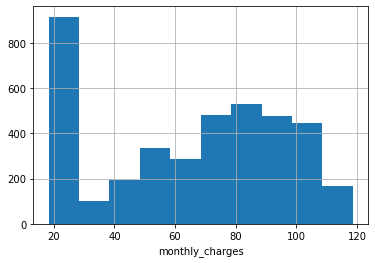

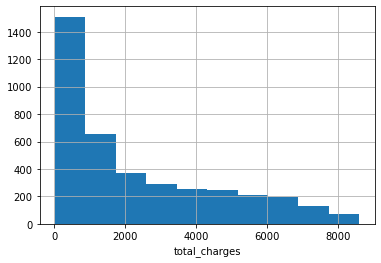

In [13]:
for col in quant_col:
    train[col].hist()
    plt.xlabel(col)
    plt.show()

In [14]:
# Visualize distributions for categorical columns
#CAT COLS
cat_col = train.select_dtypes(['object']).columns
#interesting_cat_cols

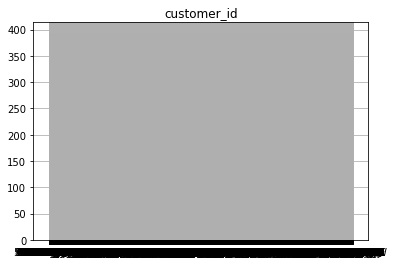

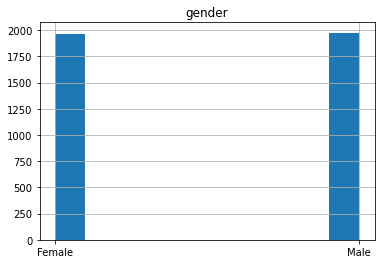

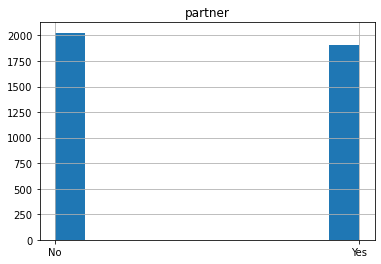

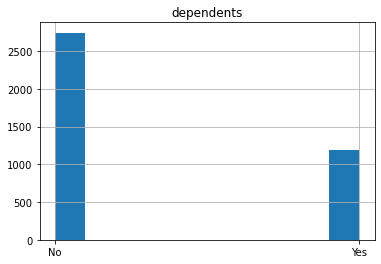

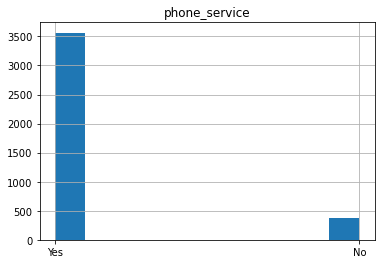

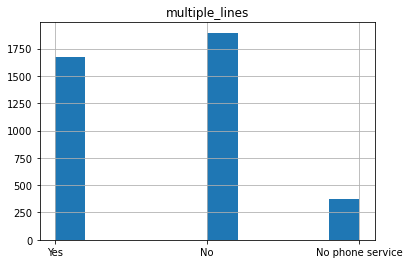

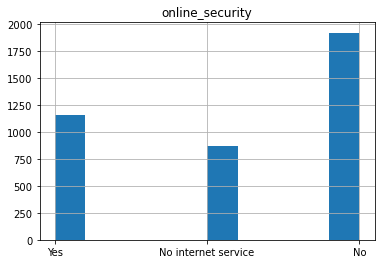

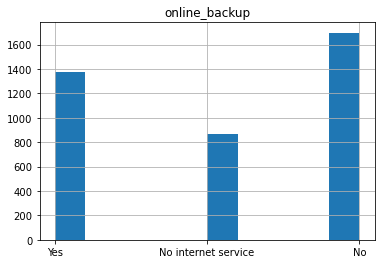

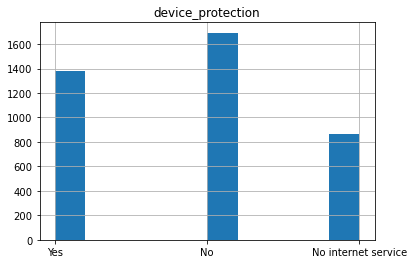

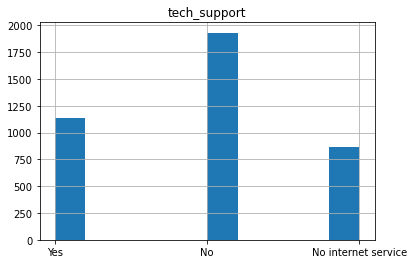

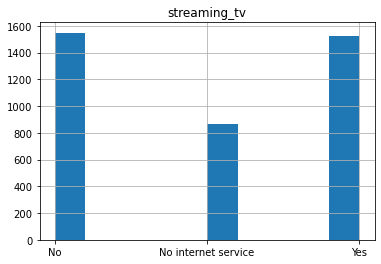

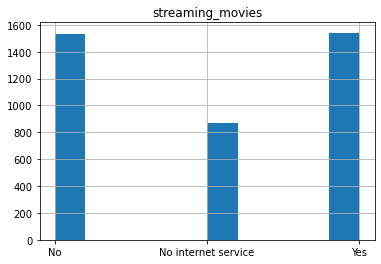

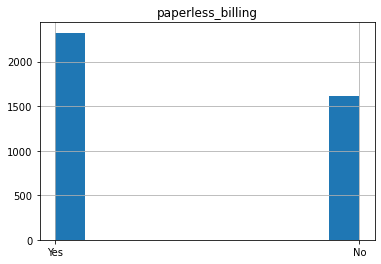

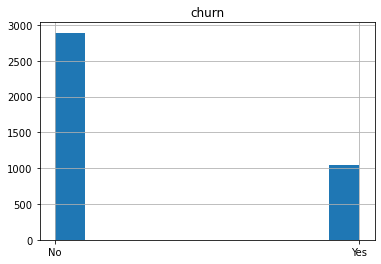

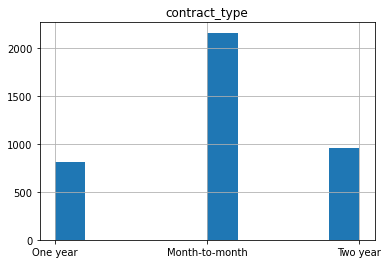

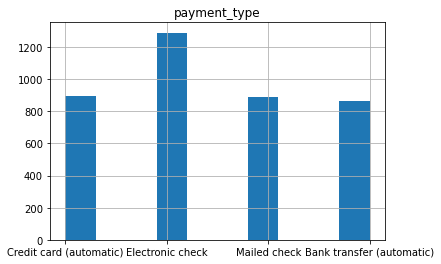

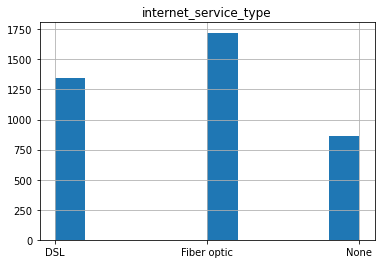

In [15]:
for col in cat_col:
    train[col].hist()
    plt.title(col)
    plt.show()

## Univariate STATS Takeaways:
 - CATEGORICAL DATA
 - Senior citizens: not a large segment of the customer base
 - **tenure: most common is 0 months and 70 months >> influx due to a campaign?**
 - monthly charges: most common is 20 dollars, then an approx normal dist from 30-120
 - total charges: 0 is the most common, suggesting influx of new customers
 - total churn is about 26% of exisiting customer base
 
 
 - QUANTITATIVE DATA
 - evenly distributed by gender
 - fairly evenly distributed by partner
 - most do not have dependents
 - most have phone service
 - most phone customers have a single line, about 40% have multiple lines
 - most customers have either no online security, or no internet service. About 30% have security
 - similar proportions for online backups
 - churn is about 25% of customers
 - month-to-month contracts are more popluar than one- and two-year contracts combined

In [16]:
# convert the train.churn data into binary
train.churn = train.churn.map({'No': 0, 'Yes': 1 })

In [17]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
5919,8331-ZXFOE,Female,0,No,No,58,Yes,Yes,Yes,Yes,...,Yes,No,No,Yes,71.10,4299.20,0,One year,Credit card (automatic),DSL
1915,2790-XUYMV,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,...,No,No,No,Yes,85.45,6028.95,0,One year,Credit card (automatic),Fiber optic
5054,7107-UBYKY,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,...,No internet service,No internet service,No internet service,Yes,25.75,882.55,0,Month-to-month,Electronic check,None
2355,3373-YZZYM,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.20,19.20,0,Month-to-month,Mailed check,None
6279,8883-GRDWQ,Male,1,No,No,20,Yes,No,Yes,No,...,Yes,No,No,No,54.00,1055.90,0,One year,Mailed check,DSL


## Q1. Are internet customers churning at significantly different rates?

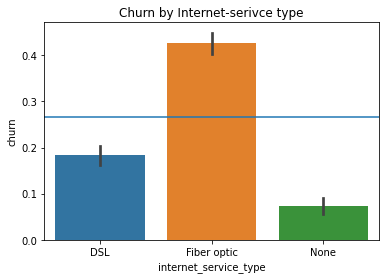

In [18]:
plt.title("Churn by Internet-serivce type")
sns.barplot(x=train.internet_service_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")

### >> Takeaway: Let's investigate Fiber Optic customers in more detail later

## Q2. Is payment type influencing churn at significantly different rates?

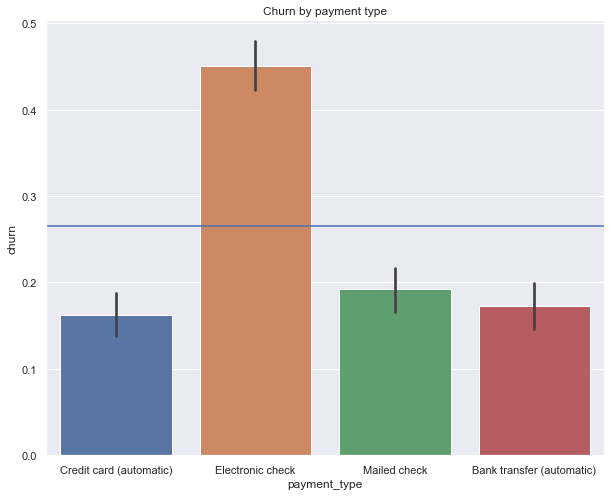

In [19]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.)
plt.title("Churn by payment type")
sns.barplot(x=train.payment_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")


### >> Takeaway: Let's investigate E-check customers in more detail later

## Q3. Is churn different among customers with and without phone service?

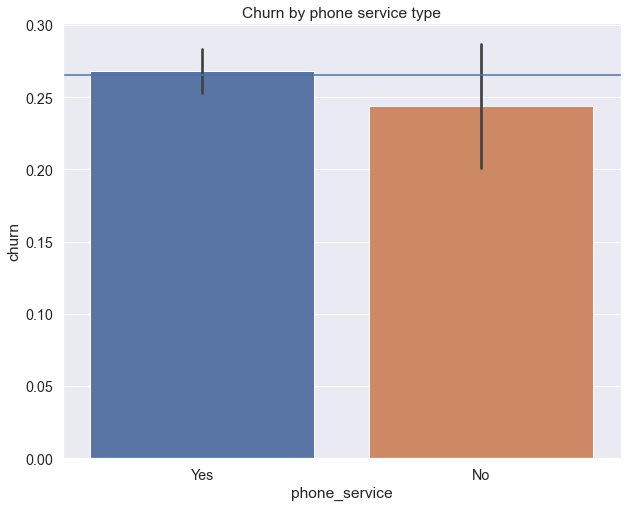

In [20]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.3)
plt.title("Churn by phone service type")
sns.barplot(x=train.phone_service, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")


### >> Takeaway: Phone service is not super interesting as a driver of churn

## Q4. Is contract type influencing churn at significantly different rates?

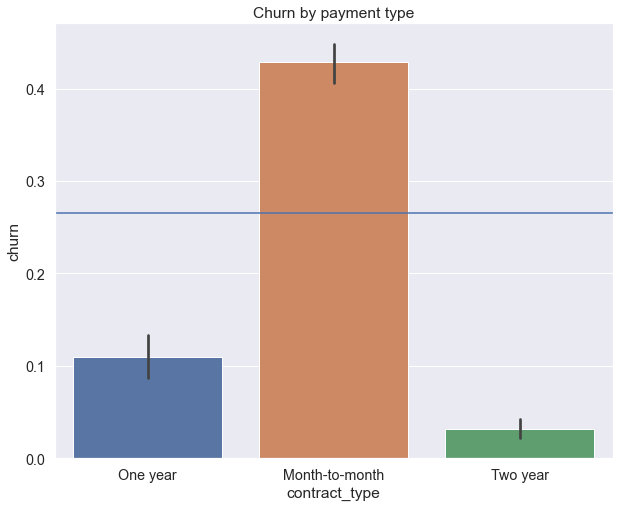

In [21]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.3)
plt.title("Churn by payment type")
sns.barplot(x=train.contract_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")

### >> Takeaway: Let's investigate Monthly customers in more detail later

## Q5. How does average tenure vary by payment type?

Text(0.5, 1.0, 'Tenure by payment type')

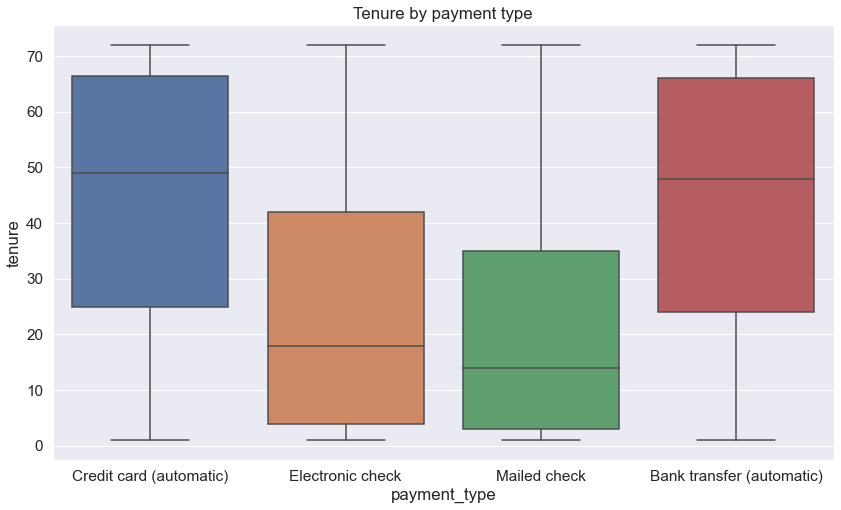

In [22]:

plt.figure(figsize=(14,8))
sns.set(font_scale = 1.4)
sns.boxplot(x=train.payment_type, y=train.tenure, data=train)
plt.title("Tenure by payment type")

### >> Takeaway: E-check and Mailed check have the lowest mean tenure, but prior viz confirms that only E-check customers are churning at significantly higher than average rates (>21%)

## Let's look at some interesting sub-groups with high churn, and create subsets

### First grouping: Fiber internet, Monthly, e-Check Customers

group 1: control (mean population churn)

group 2: customers paying by electronic check

group 3: customers paying by electronic check and consuming fiber optic internet

group 4: customers paying by electronic check and consuming fiber optic internet with monthly contracts

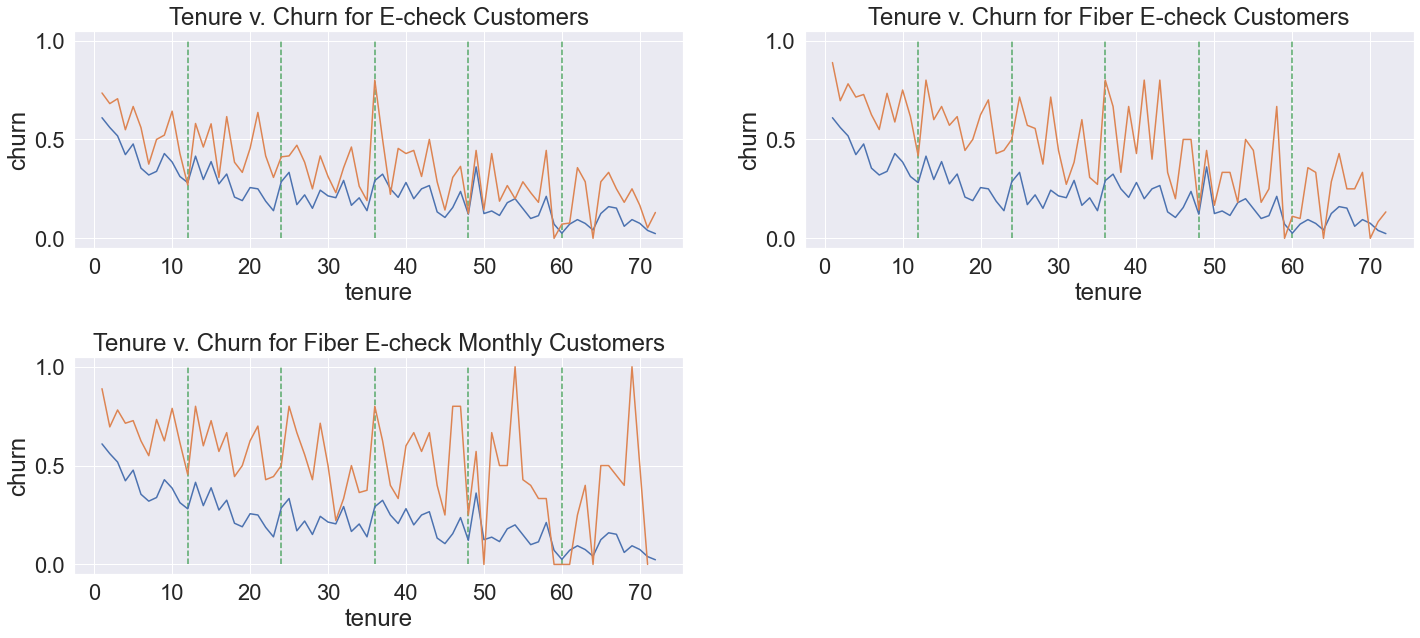

In [23]:

# Average churn in the population, by tenure
y1 = train.churn
# population churn for fiber optic, electronic check customers
y2 = train.churn[(train.payment_type == 'Electronic check')]
y3 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic')]
y4 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic') & (train.contract_type == 'Month-to-month')]
x1 = train.tenure



plt.figure(figsize=(24,10))
sns.set(font_scale = 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.subplot(221)
plt.title("Tenure v. Churn for E-check Customers")
sns.lineplot(x=x1, y=y1, data=train, ci=None)
sns.lineplot(x=x1, y=y2, data=train, ci=None)
plt.vlines(x=[12, 24, 36, 48, 60], ymin=0, ymax=1, colors='g', linestyles='dashed')


# plt.xlabel("Tenure")
# plt.ylabel("Churning customers")
# plt.legend(labels=["Population","e-check", "Fiber e-check", "Fiber monthly e-check"])

plt.subplot(222)
plt.title("Tenure v. Churn for Fiber E-check Customers")
sns.lineplot(x=x1, y=y1, data=train, ci=None)
sns.lineplot(x=x1, y=y3, data=train, ci=None)
plt.vlines(x=[12, 24, 36, 48, 60], ymin=0, ymax=1, colors='g', linestyles='dashed')

plt.subplot(223)
plt.title("Tenure v. Churn for Fiber E-check Monthly Customers")
sns.lineplot(x=x1, y=y1, data=train, ci=None)
sns.lineplot(x=x1, y=y4, data=train, ci=None)
plt.vlines(x=[12, 24, 36, 48, 60], ymin=0, ymax=1, colors='g', linestyles='dashed')





### Takeaways:
    1. E-check customers consistently exceed the baseline of average TELCO churn, especially at 10, 20 and 36 
    months. At 36 months, the value of churn for this subset is approx 80%.
    
    2. Adding the fiber as a subset increases churn even further above the baseline of 26%, with churn peaking at 
    13, 36, 42 and 44 months. Average churn rate for this subset is above 50% for the first 48 months of tenure 
    - meaning roughly half of this type of customer are leaving every month.
    
    3. Adding in the Monthly contract dimension leads to higher spikes (more volatility), and several points of 
    100% churn for this customer base at 55 and 68 months. Churn drops dramatically after those periods, because 
    there are litle to no customers in that subcategory that remain with TELCO as continuing customers.

In [24]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions

y2 = train.churn[(train.payment_type == 'Electronic check')]
y3 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic')]
y4 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic') & (train.contract_type == 'Month-to-month')]


In [25]:
alpha = 0.05

In [26]:
null_hypothesis1 = "churn and payment by e-check are independent"
alternative_hypothesis1 = "there is a relationship between churn and payment by e-check"

null_hypothesis2 = "churn and payment by e-check among fiber optic customers are independent"
alternative_hypothesis2 = "there is a relationship between churn and payment by e-check among fiber optic customers are independent"

null_hypothesis3 = "churn and payment by e-check among monthly fiber optic customers are independent"
alternative_hypothesis3 = "there is a relationship between churn and payment by e-check among monthly fiber optic customers are independent"

In [27]:
# Setup a crosstab of observed churn to payment type
observed1 = pd.crosstab(train.churn, y2)
observed2 = pd.crosstab(train.churn, y3) 
observed3 = pd.crosstab(train.churn, y4)

In [28]:
chi2, p1, degf, expected = stats.chi2_contingency(observed1)
chi2, p2, degf, expected = stats.chi2_contingency(observed2)
chi2, p3, degf, expected = stats.chi2_contingency(observed3)                                                                                                                

if p1 < alpha:
    print("Reject the null hypothesis that", null_hypothesis1)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis1)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"P is equal to: {p1}")
print()
                                                                                                                
if p2 < alpha:
    print("Reject the null hypothesis that", null_hypothesis2)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis2)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"P is equal to: {p2}") 
print()
                                                                                                                
if p3 < alpha:
    print("Reject the null hypothesis that", null_hypothesis3)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis3)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"P is equal to: {p3}")                                                                                                               

Reject the null hypothesis that churn and payment by e-check are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment by e-check
P is equal to: 2.0930513520711647e-281

Reject the null hypothesis that churn and payment by e-check among fiber optic customers are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment by e-check among fiber optic customers are independent
P is equal to: 1.3421200882993038e-188

Reject the null hypothesis that churn and payment by e-check among monthly fiber optic customers are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment by e-check among monthly fiber optic customers are independent
P is equal to: 1.8643654320506952e-152


## Bivariate STATS Takeaways:
   1. I have identified payment type (e-check), contract type (monthly), and internet service type (fiber) as the primary drivers of churn among departng customers.
   
   2. I produced visuals (bar charts for simple averages, box chart for tenure, and line charts for continuous variables) to show correlation between related variables.
   
   3. I tested for overalpping group membership with Chi2 tests for the most apparently connected variables in subsets.
    
>> **I can confidently say that payment type, contact type, and internet service type are drivers of churn in the identified categories (fiber, e-check, monthly contract)**

# 3. Modeling

1. Decision Tree Model
2. Random Forest Model
3. KNN Model
4. Logistic Regression Model


In [29]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# get the basics for math and visuals
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# add the tools for classification reports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# pull in Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
# pull in Random Forest classifer
from sklearn.ensemble import RandomForestClassifier
# pull in KNN classifer
from sklearn.neighbors import KNeighborsClassifier
# pull in Logistic Regression classifer
from sklearn.linear_model import LogisticRegression

In [30]:
# refresh my view of the data
encoded_train = encoded_train.drop(columns=['customer_id'])
encoded_validate = encoded_validate.drop(columns=['customer_id'])
encoded_test = encoded_test.drop(columns=['customer_id'])
encoded_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5919,0,58,71.10,4299.20,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
1915,0,71,85.45,6028.95,1,0,1,1,0,1,...,0,1,0,1,0,1,0,0,1,0
5054,0,35,25.75,882.55,0,1,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2355,0,1,19.20,19.20,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
6279,1,20,54.00,1055.90,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [31]:
## my modeling data is called encoded_train, encoded_validate, encoded_test

## Note: What is the baseline prediction for customer churn?

In [32]:
## the baseline prediction is the modal outcome:
churn_odds = encoded_train.churn_Yes.mean()
non_churn_odds = (1 - churn_odds)

In [33]:
churn_odds.round(2)

0.27

In [34]:
non_churn_odds.round(2)

0.73

In [35]:
if non_churn_odds > churn_odds:
    print("""The baseline prediction is that a given customer will not churn""")
else:
    print("""The baseline prediction is that a given customer will churn""")

The baseline prediction is that a given customer will not churn


In [36]:
encoded_train_baseline = pd.DataFrame(encoded_train.churn_Yes)
encoded_train_baseline['baseline'] = 0

In [37]:
# model accuracy
(encoded_train_baseline.churn_Yes == encoded_train_baseline.baseline).mean().round(2)

0.73

## 1. Decision  Tree Model

## A. Fit the classifier to your training sample, evaluate models on train and validate

In [38]:
# Split into X train and Y train

X_train = encoded_train.drop(columns = ['churn_Yes'])
Y_train = encoded_train.churn_Yes

X_validate = encoded_validate.drop(columns = ['churn_Yes'])
Y_validate = encoded_validate.churn_Yes

X_test = encoded_test.drop(columns = ['churn_Yes'])
Y_test = encoded_test.churn_Yes

In [39]:
# create an empty list to store the dictionaries
max_depth_list = []
reports = []

# write the for loop to sequentially loop through the values for i,
# setting i as the value, or inverse value, for 
for i in range(1, 11):
        # create the decision tree object with desired hyper-parameters:
        clf = DecisionTreeClassifier(max_depth=i)
    
        # fit the decision tree to the training data:
        clf = clf.fit(X_train, Y_train)
    
        #make predictions:
        churn_prediction = pd.DataFrame(clf.predict(X_train))
        
        # Predict probability
        churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
        
        # compute the estimate accuracy
        train_set_accuracy = clf.score(X_train, Y_train)
    
        # Create a confusion matrix
        #confusion_matrix = confusion_matrix(Y_train, churn_prediction)
        
        #labels = sorted(Y_train.unique())
        #pd.DataFrame(confusion_matrix((Y_train, churn_prediction), index=labels, columns=labels))
        
        # Create a classification report
        #class_rep = pd.DataFrame(classification_report(Y_train, churn_prediction))
    
        #evaluate on out-of-sample-date
        validate_set_accuracy = clf.score(X_validate, Y_validate)
    
        max_depth_list.append({
                            'max_depth': i,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy
                                    })

In [40]:
df = pd.DataFrame(max_depth_list)
df['difference'] = (df.training_accuracy - df.validate_accuracy)

In [41]:
df.sort_values(['validate_accuracy','difference'], ascending=[False, True]).head(3)

,max_depth,training_accuracy,validate_accuracy,difference
5,6,0.817374,0.779028,0.038345
3,4,0.800610,0.777844,0.022766
1,2,0.794006,0.776066,0.017939


<Figure size 864x648 with 0 Axes>

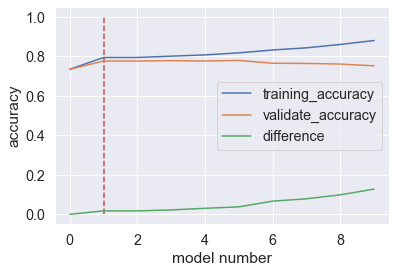

In [42]:
plt.figure(figsize=(12, 9))
sns.set(font_scale = 1.3)
df[['training_accuracy', 'validate_accuracy', 'difference' ]].plot()
plt.ylabel("accuracy")
plt.xlabel("model number")
plt.vlines(x=[1], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.show()

## B. highlight the best model DTC.

In [43]:
# Run the model on the test with Max Depth = 2 (which was the best performing DTC)

best_DTC_model = []

In [44]:
# create the decision tree object with desired hyper-parameters:
clf = DecisionTreeClassifier(max_depth=2)
    
# fit the decision tree to the training data:
clf = clf.fit(X_train, Y_train)
    
#make predictions:
churn_prediction = pd.DataFrame(clf.predict(X_train))
        
# Predict probability
churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
        
# compute the estimate accuracy
train_set_accuracy = clf.score(X_train, Y_train)

#evaluate on out-of-sample-data
validate_set_accuracy = clf.score(X_validate, Y_validate)
        
best_DTC_model.append(
    {'max_depth': 2,
     'training_accuracy': train_set_accuracy,
     'validate_accuracy': validate_set_accuracy,
     'difference': (train_set_accuracy - validate_set_accuracy)}
                    )

In [45]:
best_DTC_df = pd.DataFrame(best_DTC_model)
best_DTC_df

,max_depth,training_accuracy,validate_accuracy,difference
0,2,0.794006,0.776066,0.017939


### Decision Tree Classifier Takeaways:
1. the best performing model had the following features:

    a. max depth of 2.
    
    b. predictive classification accuracy of 77.6% on validate (out of sample) data.

## 2. Random Forest Classifier 

## A. Fit the model and loop through max_depth and min_leaf_samples

In [46]:
# create an empty list to store the dictionaries
max_depth_and_leaf_samples_list = []

# write the for loop to sequentially loop through the values for i,
# setting i as the value, or inverse value, for 
for i in range(1, 16):
    for j in range(1, 16):
        # create the random forest object with desired hyper-parameters:
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
    
        # fit the random forest to the training data:
        rf.fit(X_train, Y_train)
    
        # Evaluate importance, or weight, of each feature.
        rf.feature_importances_
    
        # Classify each passenger by its estimated survival.
        y_pred = rf.predict(X_train)
    
        # Estimate the probability of survival, using the training data.
        y_pred_proba = rf.predict_proba(X_train)
        
        # compute the estimate accuracy
        train_set_accuracy = rf.score(X_train, Y_train)
    
        #evaluate on out-of-sample-date
        validate_set_accuracy = rf.score(X_validate, Y_validate)
    
        max_depth_and_leaf_samples_list.append({
                            'max_depth': i,
                            'min_samples_leaf': j,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy,
                            'difference': (train_set_accuracy - validate_set_accuracy)
                                    })


In [47]:
df = pd.DataFrame(max_depth_and_leaf_samples_list)
df.sort_values(['validate_accuracy', 'difference'], ascending = [False, True]).head(3)

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,difference
163,11,14,0.821438,0.802133,0.019305
169,12,5,0.855728,0.801540,0.054187
113,8,9,0.823470,0.799171,0.024299


<Figure size 1080x720 with 0 Axes>

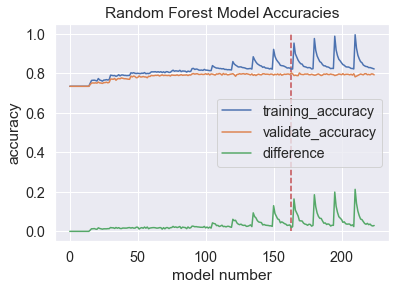

In [48]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.3)
df[['training_accuracy', 'validate_accuracy', 'difference' ]].plot()
plt.title("Random Forest Model Accuracies")
plt.ylabel("accuracy")
plt.xlabel("model number")
plt.vlines(x=[163], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.show()

## B. Highlght the best RFC model.

In [49]:
# Run the model on the test with Max Depth = 2 (which was the best performing DTC)

best_RFC_model = []

In [50]:
i = 11
j = 14
# create the random forest object with desired hyper-parameters:
rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
    
# fit the random forest to the training data:
rf.fit(X_train, Y_train)
    
# Evaluate importance, or weight, of each feature.
rf.feature_importances_
    
# Classify each passenger by its estimated survival.
y_pred = rf.predict(X_train)
    
# Estimate the probability of survival, using the training data.
y_pred_proba = rf.predict_proba(X_train)
        
# compute the estimate accuracy
train_set_accuracy = rf.score(X_train, Y_train)
    
#evaluate on out-of-sample-data
validate_set_accuracy = rf.score(X_validate, Y_validate)
    
best_RFC_model.append({
    'max_depth': i,
    'min_samples_leaf': j,
    'training_accuracy': train_set_accuracy,
    'validate_accuracy': validate_set_accuracy,
    'train_val_diff': (train_set_accuracy - validate_set_accuracy)
                                    })

In [51]:
best_RFC_df = pd.DataFrame(best_RFC_model)
best_RFC_df

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,train_val_diff
0,11,14,0.826772,0.795616,0.031156


### Random Forest Classifier Takeaways:
1. the best performing model had the following features:

    a. max depth of 11
    
    b. min_samples_leaf of 14
    
    c. predictive classification accuracy of 79.6% on validate (out of sample) data.

## 3. KNN Classifier 

## A. Fit the model and loop through k-values

In [52]:
k_neighbors_outputs = []

for i in range(1,16):
    # set weights as uniform and build the classifier:
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    # fit the model to the dataset
    knn.fit(X_train, Y_train)
    # make predictions
    y_pred = knn.predict(X_train)
    # get prediction probabilites
    y_pred_proba = knn.predict_proba(X_train)
    # get the accuracy of the KNN classifier on training data set
    train_set_accuracy = knn.score(X_train, Y_train)
    # get the accuracy of the KNN classifier on training data set
    validate_set_accuracy = knn.score(X_validate, Y_validate)
    
    k_neighbors_outputs.append({
                            'n_neighbors': i,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy,
                            'difference': (train_set_accuracy - validate_set_accuracy)
                                })

In [53]:
df = pd.DataFrame(k_neighbors_outputs)
df.sort_values(['validate_accuracy', 'difference'], ascending = [False, True]).head(3)

,n_neighbors,training_accuracy,validate_accuracy,difference
7,8,0.814580,0.783768,0.030812
14,15,0.803658,0.781398,0.022260
8,9,0.814834,0.777251,0.037582


<Figure size 1080x720 with 0 Axes>

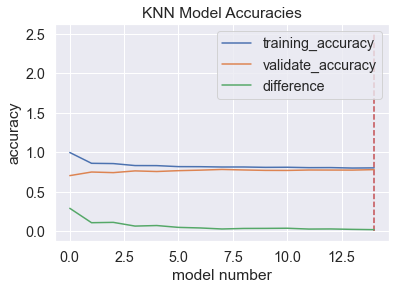

In [54]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.3)
df[['training_accuracy', 'validate_accuracy', 'difference' ]].plot()
plt.title("KNN Model Accuracies")
plt.ylabel("accuracy")
plt.xlabel("model number")
plt.vlines(x=[14], ymin=0, ymax=2.5, colors='r', linestyles='dashed')
plt.show()

### B. Highlght the best KNN model.

In [55]:
# # Run the model on the test with Max Depth = 2 (which was the best performing DTC)

best_KNN_model = []

In [56]:
i = 14
# set weights as uniform and build the classifier:
knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
# fit the model to the dataset
knn.fit(X_train, Y_train)
# make predictions
y_pred = knn.predict(X_train)
# get prediction probabilites
y_pred_proba = knn.predict_proba(X_train)
# get the accuracy of the KNN classifier on training data set
train_set_accuracy = knn.score(X_train, Y_train)
# get the accuracy of the KNN classifier on training data set
validate_set_accuracy = knn.score(X_validate, Y_validate)
    
best_KNN_model.append({
    'k_neighbors': i,
    'training_accuracy': train_set_accuracy,
    'validate_accuracy': validate_set_accuracy,
    'train_val_diff': (train_set_accuracy - validate_set_accuracy)
                                    })

In [57]:
best_KNN_df = pd.DataFrame(best_KNN_model)
best_KNN_df

,k_neighbors,training_accuracy,validate_accuracy,train_val_diff
0,14,0.801372,0.775474,0.025898


### KNN Classifier Takeaways:
1. the best performing model had the following features:

    a. k_neighbors of 14
    
    b. predictive classification accuracy of 77.5% on validate (out of sample) data.

## 4. Logistic Regression Classifier 

## A. Fit the model and loop through C-values

In [58]:
log_regress_outputs = []
i = 1
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=i, random_state=123, intercept_scaling=1, solver='lbfgs')
# Fit the Logistic Regression model
logit.fit(X_train, Y_train)
# Get the predictions from the Logistic Regression Model
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
# compute the estimate accuracy
train_set_accuracy = logit.score(X_train, Y_train)
#evaluate on out-of-sample-data
validate_set_accuracy = logit.score(X_validate, Y_validate)
    
log_regress_outputs.append({
                            'c_values': i,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy,
                            'tarin_val_diff': (train_set_accuracy - validate_set_accuracy)
                                })

In [59]:
df_log_regress = pd.DataFrame(log_regress_outputs)
df_log_regress.sort_values(['validate_accuracy', 'train_val_diff'], ascending = [False, True]).head(3)

KeyError: 'train_val_diff'

### Logistic Regression Classifier Takeaways:
1. the best performing model had the following features:

    a. c_value of 1
    
    b. predictive classification accuracy of 79.9% on validate (out of sample) data.

## 5. Test the most effective model on the Test Dataset

### Let's review the effectiveness of each model:

### 1. Decision Tree Classifier

In [ ]:
best_DTC_df

#### Effectiveness: 77.6%

### 2. Random Forest Classifier

In [ ]:
best_RFC_df

#### Effectiveness: 79.6%

### 3. KNN Model

In [ ]:
best_KNN_df

#### Effectiveness: 77.5%

### 4. Logistical Regression Model

In [ ]:
df_log_regress.sort_values(['validate_accuracy', 'train_val_diff'], ascending = [False, True]).head(3)

#### Effectiveness: 79.9%

## Validation testing Takeaway:

>> The Logistic Regression Model performed the best on validation data. Now I will test it on my test data set.

In [ ]:
#evaluate on out-of-sample-data (TEST)
test_set_accuracy = logit.score(X_test, Y_test)
#add to the dataframe for a quick comparison with the validation and train scores:
df_log_regress['test_accuracy'] = test_set_accuracy
df_log_regress['val_test_diff'] = (df_log_regress.validate_accuracy - df_log_regress.test_accuracy)
df_log_regress

## Test set modeling Takeaway:

>> The Logistic Regression Model provided accuracy of 80.5% on the out-of-sample (test) data.

## Produce Predictions CSV

In [ ]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

predictions = pd.DataFrame({
    "customer_id": test.customer_id, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
    "prediction": y_pred,
    "probability_of_churn": y_pred_proba[:,1] #yields only the churn probability, not the non-churn probabilities
})

predictions.to_csv("predictions.csv")